# BeautifulSoup and APIs in Python

You know all of these data science and machine learning techniques, you're ready to take on the world. There's one problem, where do you get data? You can always access free data at sites like <a href = 'https://www.kaggle.com'>Kaggle</a>, but sometimes you have a project idea and no matter how hard you Google you can't find the exact data you need. Looks like you're out of luck.
    
Not so fast! There are actually a number of ways that you can find the data you're looking for and collect it in a format that you want using python. We'll learn about two techniques in this notebook, BeautifulSoup and python API wrappers.

## BeautifulSoup

We'll start with <a href = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/">BeautifulSoup</a>. This is a wonderful package that allows you to scrape html files for the data you would like to retrieve. Before we can get going make sure that it is installed on your laptop. If you are using `pip` type `pip install beautifulsoup4`, `pip3 install beautifulsoup` if you're on a Mac. Now run the code in the next block to check that it was installed.

In [1]:
from bs4 import BeautifulSoup

### A Toy Example

BeautifulSoup takes in an html document and will 'parse' it for you so that you can extract the information you want. We'll start with a simple example.

In [2]:
# This is an html chunk
# It has a head and a body, just like you
html_doc = """
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""

In [3]:
# Now we make a BeautifulSoup object
soup = BeautifulSoup(html_doc,'html.parser')

In [4]:
# Let's use the prettify method to make our html pretty and see what it has to say
print(soup.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


I've also saved this html text as an html file in this repository. It's labeled SampleHTML.html, go ahead and open it and compare it with our `prettify()` output. html files have a natural tree structure that we'll briefly cover now. Here's the tree of our sample html:

<img src = "html_tree.png" width = "500"></img>

Each level in the tree represents a 'generation' of the html code. for instance the body has 3 p children, the leftmost p has one b child. `BeautifulSoup` helps us traverse these trees to gather the data we want.

In [6]:
# Below are some examples of beautifulsoup methods that help us
# better understand the structure of html code

# What is the title of the page?
print(soup.title)
print()

# What if I just want the text?
print(soup.title.string)
print()

# What html structure is the title's parent?
print(soup.title.parent.name)
print(soup.title.parent)
print()

# What is the first a of the html document?
print(soup.a)

# What is the first a's class?
print(soup.a['class'])
print()

# There are multiple a's can I find all of them?
print(soup.find_all('a'))
for a in soup.find_all('a'):
    print()
    print(a['class'], a.string)
    

<title>The Dormouse's story</title>

The Dormouse's story

head
<head><title>The Dormouse's story</title></head>

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
['sister']

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

['sister'] Elsie

['sister'] Lacie

['sister'] Tillie


#### Practice :-D

In [ ]:
# Now you practice!

# Find the first p of the document
# What is the first p's class? What string is in that p?






In [ ]:
# For all of the a's in the document find their href






Now we've got some experience let's move on to code from a real webpage.

### Now We're of Drinking Age

I've included in this repository some html code from an <a href = "https://untappd.com/home">Untappd</a> search. We can read in that file with the following code. I went to untappd, and found the <a href = "https://www.seventhsonbrewing.com">Seventh Son</a> page then clicked on their beer list and only saved the html code from the results.

In [7]:
seventh_son_beer_search = open("SeventhSon.html", 'r')

soup = BeautifulSoup(seventh_son_beer_search, 'html.parser')

In [8]:
print(soup.prettify())

<div class="beer-container">
 <div class="beer-item" data-bid="382779">
  <a class="label" href="/b/seventh-son-brewing-company-humulus-nimbus/382779">
   <img src="https://untappd.akamaized.net/site/beer_logos/beer-382779_814af_sm.jpeg"/>
  </a>
  <div class="beer-details">
   <p class="name">
    <a href="/b/seventh-son-brewing-company-humulus-nimbus/382779">
     Humulus Nimbus
    </a>
   </p>
   <p class="style">
    Pale Ale - American
   </p>
   <p class="desc desc-half-382779">
    A pale golden ale that is both super crisp and super hop forward with a refreshing mouthfeel and a summer friendly 6% abv. Mosaic &amp; simcoe hops lend tart…
    <a class="read-more-beerlist track-click" data-bid="382779" data-href=":readmorebeer" data-track="brewerylist" href="#">
     Read More
    </a>
   </p>
   <p class="desc desc-full-382779" style="display: none;">
    A pale golden ale that is both super crisp and super hop forward with a refreshing mouthfeel and a summer friendly 6% abv. Mo

As we can see from the `prettify()` output this html code is much more complicated than our toy example from above, but `BeautifulSoup` is able to handle it all the same. Let's write some code to go through the html and grab the beer names and then store those names in a list.

In [9]:
# We can see from prettify that a div with class "beer-container"
# Stores is the parent of all of every item in the code
print(soup.div['class'])
print()

# We can also see that each beer is contained in a "beer-item" div
print(soup.div.div)

['beer-container']

<div class="beer-item" data-bid="382779">
<a class="label" href="/b/seventh-son-brewing-company-humulus-nimbus/382779">
<img src="https://untappd.akamaized.net/site/beer_logos/beer-382779_814af_sm.jpeg"/>
</a><div class="beer-details">
<p class="name"><a href="/b/seventh-son-brewing-company-humulus-nimbus/382779">Humulus Nimbus </a></p>
<p class="style">Pale Ale - American</p>
<p class="desc desc-half-382779">A pale golden ale that is both super crisp and super hop forward with a refreshing mouthfeel and a summer friendly 6% abv. Mosaic &amp; simcoe hops lend tart… <a class="read-more-beerlist track-click" data-bid="382779" data-href=":readmorebeer" data-track="brewerylist" href="#">Read More</a> </p>
<p class="desc desc-full-382779" style="display: none;">A pale golden ale that is both super crisp and super hop forward with a refreshing mouthfeel and a summer friendly 6% abv. Mosaic &amp; simcoe hops lend tart blueberry and fragrant pine to a pleasingly bitter dand

Look at that single beer item. Highlight for yourself the line of html that has our beer name

In [ ]:
# <p class="name"><a href="/b/seventh-son-brewing-company-humulus-nimbus/382779">Humulus Nimbus </a></p>

We can see this is the first `p` contained in the `beer-details` `div`. So we can extract the info in the following way.

In [10]:
# The first div is for the beer container
# The second div is for the beer item
# The third div is for the beer details
# The p is for the first p that contains the name
print(soup.div.div.div.p['class'])
# The name is stored in an a within the p
print(soup.div.div.div.p.a.string)

['name']
Humulus Nimbus 


In [11]:
# Now let's accomplish our initial goal of getting all the names.
# Make an empty list
Names = []

# for each beer item in the beer container
for div in soup.div.find_all('div'):
    Names.append(div.p.a.string)


AttributeError: 'NoneType' object has no attribute 'string'

In [12]:
# Uh oh! What happened? Let's investigate
Names

['Humulus Nimbus ', 'Humulus Nimbus ']

In [13]:
# Well that's not good... Let's investigate more
for div in soup.div.find_all('div'):
    print(div.p)

<p class="name"><a href="/b/seventh-son-brewing-company-humulus-nimbus/382779">Humulus Nimbus </a></p>
<p class="name"><a href="/b/seventh-son-brewing-company-humulus-nimbus/382779">Humulus Nimbus </a></p>
<p class="abv">
6% ABV </p>
<p class="name"><a href="/b/seventh-son-brewing-company-proliferous/1388263">Proliferous</a></p>
<p class="name"><a href="/b/seventh-son-brewing-company-proliferous/1388263">Proliferous</a></p>
<p class="abv">
8.3% ABV </p>
<p class="name"><a href="/b/seventh-son-brewing-company-the-scientist/832910">The Scientist</a></p>
<p class="name"><a href="/b/seventh-son-brewing-company-the-scientist/832910">The Scientist</a></p>
<p class="abv">
7% ABV </p>
<p class="name"><a href="/b/seventh-son-brewing-company-seventh-son-american-strong-ale/349430">Seventh Son American Strong Ale</a></p>
<p class="name"><a href="/b/seventh-son-brewing-company-seventh-son-american-strong-ale/349430">Seventh Son American Strong Ale</a></p>
<p class="abv">
7.7% ABV </p>
<p class="na

In [14]:
# There are repeats, and not all of them are beer items?
i = 0
for div in soup.div.find_all('div'):
    print(div)
    print()
    
    i = i + 1
    if i > 2:
        break

<div class="beer-item" data-bid="382779">
<a class="label" href="/b/seventh-son-brewing-company-humulus-nimbus/382779">
<img src="https://untappd.akamaized.net/site/beer_logos/beer-382779_814af_sm.jpeg"/>
</a><div class="beer-details">
<p class="name"><a href="/b/seventh-son-brewing-company-humulus-nimbus/382779">Humulus Nimbus </a></p>
<p class="style">Pale Ale - American</p>
<p class="desc desc-half-382779">A pale golden ale that is both super crisp and super hop forward with a refreshing mouthfeel and a summer friendly 6% abv. Mosaic &amp; simcoe hops lend tart… <a class="read-more-beerlist track-click" data-bid="382779" data-href=":readmorebeer" data-track="brewerylist" href="#">Read More</a> </p>
<p class="desc desc-full-382779" style="display: none;">A pale golden ale that is both super crisp and super hop forward with a refreshing mouthfeel and a summer friendly 6% abv. Mosaic &amp; simcoe hops lend tart blueberry and fragrant pine to a pleasingly bitter dandelion finish. We wan

So `find_all` is cycling through all possible offspring of our `beer-container` `div` that themselves are `divs`. This means when a child `div` itself has children that are `divs` things get repeated. We can avoid this in two ways. One a for loop with a conditional.

In [15]:
Names = []

for div in soup.div.find_all('div'):
    if div['class'][0] == "beer-item":
        Names.append(div.p.a.string)
        
Names

['Humulus Nimbus ',
 'Proliferous',
 'The Scientist',
 'Seventh Son American Strong Ale',
 'Stone Fort Oat Brown',
 'Oubliette',
 'Syzygy',
 'Assistant Manager',
 'Goo Goo Muck',
 'Golden Ratio',
 'Gleen',
 'Lost Sparrow',
 'Fox In the Stout',
 'Wilderman',
 'Mr. Owl',
 'Ladies And Gentlemen',
 'Brother Jon',
 'Chester Copperpot',
 'Willowolf',
 'Rime',
 'Black Sheep',
 "Hadron's Collision Table Beer",
 'Laniakea',
 'Sun Mouth',
 'Abaddon',
 'The Wild Hunt',
 'Qahwah Arab Imperial Coffee Stout',
 'Lemongrass Wit',
 'Baphomet',
 'Tessera',
 'Prime Swarm',
 'Bibendum',
 'Toast',
 'Cloudbusting',
 '4x4 Smash Ale',
 'Plowshare',
 'Big Black Cow',
 'La Mort Saison',
 'The Odd Son',
 'Nonsense',
 'Ragana Yaga',
 'Tinkerton',
 'Scam Likely',
 'Sprig',
 'Jack In the Green',
 'Joe the Lion',
 'Ootheca',
 'The Cruelest Month',
 'Smooth Pursuit',
 'Goblin King',
 'Abbey Normaal',
 'Haymake',
 'Peach Blossom',
 'Caribbean Tonic',
 "Irene's Revenge",
 'Grave Blanket Dark Rye Ale',
 'International H

While this works as a hacky way to get what we want, it is not ideal. There is a better `BeautifulSoup` way

In [ ]:
Names = []

# Tell find_all you only want the beer-items!
for div in soup.div.find_all('div', 'beer-item'):
    Names.append(div.p.a.string)
    
Names

#### Practice :-D

In [ ]:
# You can practice here
# Make a list of all of the beers' styles on this html page






In [ ]:
# Use some other python tools you know to describe Seventh Son 
# beers through the styles you've found







Now we've gotten practice with a short html string we wrote ourselves, and a very nice html page that I saved ahead of time. Now let's see how we can make soup while surfing the web.

### Surfing the Web

We'll scrape some data from this wikia page on the Incredible Hulk, https://marvel.fandom.com/wiki/Bruce_Banner_(Earth-616), one of my favorite super heroes. 

First thing we have to do is retrieve the actual html file. It's best to have python do this for us.

In [16]:
from urllib.request import urlopen

In [17]:
hulk_smash = urlopen("https://marvel.fandom.com/wiki/Bruce_Banner_(Earth-616)")

In [18]:
pea_soup = BeautifulSoup(hulk_smash, "html.parser")

# Get it? The Hulk is green, pea_soup is green

In [19]:
print(pea_soup.prettify())

<!DOCTYPE doctype html>
<html class="" dir="ltr" lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, user-scalable=yes" name="viewport"/>
  <meta content="MediaWiki 1.19.24" name="generator">
   <meta content="Marvel Database,enmarveldatabase,Bruce Banner (Earth-616),Bruce Banner,The Hulk,Bruce Banner (Earth-616)/Gallery,Click here for help with this field,Robert Bruce Banner,Annihilator,Bob Danner,Bruce Bancroft,Bruce Barnes,Bruce Baxter" name="keywords">
    <meta content="This is an abridged version of Bruce Banner's history. For a complete history see Bruce Banner's Expanded History Robert Bruce Banner is the son of Dr. Brian Banner, an atomic physicist, and his wife Rebecca. Although Rebecca deeply loved Bruce, who returned her affection, Brian hated their..." name="description"/>
    <meta content="summary" name="twitter:card"/>
    <meta content="@getfandom" name="twitter:site"/>
    <meta content="https:

As we can see Hulk have... not very pretty html code. This is because we're dealing with an actual webpage that includes javascript, css, and svg code. These webpages have a lot of data on them, most of which is meaningless to us. In our prior two examples we could look at the html and see for ourselves what we want to pull. Unless you have super vision that won't be possible here. So what do we do?

Is it a bird or a plane, no it's your browser's developer tools! Click on the webpage link for the Hulk's wikia page. Now we'll open your browser's developer tools and see how powerful they are. Go here, https://www.wickedlysmart.com/hfhtml5/devtools.html, to get help on how to access those tools for your browser.

Now let's say our goal is find out when and in which comic the Hulk first appeared. I can use my developer tools to help highlight where in the html I can find that. I'll make notes of the parents and children I'll need below.

In [20]:
# Notes
print(pea_soup.find('article','WikiaMainContent')
      .find('div','WikiaMainContentContainer')
      .find('div','WikiaArticle')
      .find('div','mw-content-ltr mw-content-text')
      .find('div','conjoined-infoboxes')
      .find('aside',"portable-infobox pi-background pi-theme-character pi-layout-default")
      .find_all('section',"pi-item pi-group pi-border-color")[-1]
      .find('table')
      .find('tbody')
      .find('tr')
      .find_all('a'))

[<a href="/wiki/Incredible_Hulk_Vol_1_1" title="Incredible Hulk Vol 1 1"><i>Incredible Hulk </i> #1</a>, <a href="/wiki/Category:1962,_May" title="Category:1962, May">May, 1962</a>]


In [21]:
# Let's collect the data now
first_app = pea_soup.find('article','WikiaMainContent').find('div','WikiaMainContentContainer').find('div','WikiaArticle').find('div','mw-content-ltr mw-content-text').find('div','conjoined-infoboxes').find('aside',"portable-infobox pi-background pi-theme-character pi-layout-default").find_all('section',"pi-item pi-group pi-border-color")[-1].find('table').find('tbody').find('tr').find_all('a')

i = 0
for a in first_app:
    if i == 0:
        first_app_comic = a.string
    else:
        first_app_date = a.string
    i = i + 1
    
Hulk = {}
Hulk['First Appearance Comic'] = first_app_comic
Hulk['First Appearance Date'] = first_app_date

print(Hulk)

{'First Appearance Comic': None, 'First Appearance Date': 'May, 1962'}


In [22]:
# What went wrong?
for a in first_app:
    print(a)

<a href="/wiki/Incredible_Hulk_Vol_1_1" title="Incredible Hulk Vol 1 1"><i>Incredible Hulk </i> #1</a>
<a href="/wiki/Category:1962,_May" title="Category:1962, May">May, 1962</a>


In [23]:
# The <i> messes up the string we can fix with .get_text()
for a in first_app:
    if i == 0:
        first_app_comic = a.get_text()
    else:
        first_app_date = a.get_text()
    i = i + 1
    
Hulk = {}
Hulk['First Appearance Comic'] = first_app_comic
Hulk['First Appearance Date'] = first_app_date

print(Hulk)

{'First Appearance Comic': None, 'First Appearance Date': 'May, 1962'}


Now this may seem silly since we can easily read this ourselves and write it down. But imagine if you worked for a data blog and you wanted to write a story about the first appearance of all of Marvel's superheroes? This allows to write a script to collect the data for us!

In [24]:
characters = {'Hulk':"https://marvel.fandom.com/wiki/Bruce_Banner_(Earth-616)",
                'Iron Man':'https://marvel.fandom.com/wiki/Anthony_Stark_(Earth-616)',
                'Thor':'https://marvel.fandom.com/wiki/Thor_Odinson_(Earth-616)',
                'Captain America':'https://marvel.fandom.com/wiki/Steven_Rogers_(Earth-616)',
                'Hawkeye':'https://marvel.fandom.com/wiki/Clinton_Barton_(Earth-616)',
                'Black Widow':'https://marvel.fandom.com/wiki/Natalia_Romanova_(Earth-616)'}

In [25]:
def get_first_appearance(link):
    html = urlopen(link)
    soup = BeautifulSoup(html, "html.parser")
    first_app = soup.find('article','WikiaMainContent').find('div','WikiaMainContentContainer').find('div','WikiaArticle').find('div','mw-content-ltr mw-content-text').find('div','conjoined-infoboxes').find('aside',"portable-infobox pi-background pi-theme-character pi-layout-default").find_all('section',"pi-item pi-group pi-border-color")[-1].find('table').find('tbody').find('tr').find_all('a')

    i = 0
    for a in first_app:
        if i == 0:
            first_app_comic = a.get_text()
        else:
            first_app_date = a.get_text()
        i = i + 1
        
    return {'First Appearance Comic':first_app_comic,'First Appearance Date':first_app_date}

In [26]:
# Avengers Assemble!
Avengers = {}

for character,link in characters.items():
    Avengers[character] = get_first_appearance(link)

In [27]:
for key in Avengers.keys():
    print(key,Avengers[key])
    print()

Hulk {'First Appearance Comic': 'Incredible Hulk  #1', 'First Appearance Date': 'May, 1962'}

Iron Man {'First Appearance Comic': 'Tales of Suspense  #39', 'First Appearance Date': 'March, 1963'}

Thor {'First Appearance Comic': 'Venus  #11', 'First Appearance Date': 'August, 1962'}

Captain America {'First Appearance Comic': 'Captain America Comics  #1', 'First Appearance Date': 'March, 1941'}

Hawkeye {'First Appearance Comic': 'Tales of Suspense  #57', 'First Appearance Date': 'April, 2007'}

Black Widow {'First Appearance Comic': 'Tales of Suspense  #52', 'First Appearance Date': 'September, 2017'}



Wow `BeautifulSoup` is awesome! But as we saw in our most recent example, real websites are messy and it would be a hassle to have to go through every website using the developer tool like we just did. Luckily, people have had that very thought and developed python wrappers for APIs for various sites. We'll go over a couple of those next. But first, if you're interested in learning more about `BeautifulSoup` check out the documentation here, https://www.crummy.com/software/BeautifulSoup/bs4/doc/.

## Going Ape for APIs

What the heck is an API? Instead of reading through a bunch of sentences watch this video, https://www.youtube.com/watch?v=s7wmiS2mSXY, it explains the concept of an API in a great way.

Now these APIs exist for many of your favorite services like Twitter, Reddit, Spotify, and more. Now for a number of sites you'd have to write your own code to interact with the API, however, for the most popular digital services someone else has already done that for us. We'll go through a couple different examples of python wrappers for APIs.

### Hoop There it is

Perhaps you've seen a shot chart like the one seen here, https://i.redd.it/6g9o1dwz1oc21.png. Maybe you'd like to make code to make a chart just like that, but how do you get the data? The data exists here, https://stats.nba.com, but as we said you don't want go copy and paste the data by hand, and beautiful soup code might be a hassle. Enter the package `nba_api`. This package is a python wrapper for the nba stats API. You can find its documentation here on github, https://github.com/swar/nba_api. We'll now show how we can grab nba shot chart data with `nba_api`. 

First make sure you install the package, if you're using `pip` run the following `pip install nba_api`, `pip3 install nba_api` if you're using a Mac.

In [28]:
# Run the following to check
import nba_api

In [29]:
# We'll first grab the player we want
from nba_api.stats.static import players

# Returns a list of all nba players
player_list = players.get_players()
print(player_list[27])

{'id': 201167, 'full_name': 'Arron Afflalo', 'first_name': 'Arron', 'last_name': 'Afflalo', 'is_active': False}


In [30]:
# We've got a list with each entry being a dictionary
# Let's grab data for Damian Lillard
lillard = [player for player in player_list if player['full_name'] == 'Damian Lillard'][0]

We've got a player, now we can grab their shot chart data. This is done with `shotchartdetail`, I found this by browsing the documentation page, https://github.com/swar/nba_api/blob/master/docs/nba_api/stats/endpoints/shotchartdetail.md.

In [31]:
# Import the shotchartdetail
from nba_api.stats.endpoints import shotchartdetail

lillard_shots = shotchartdetail.ShotChartDetail(player_id = lillard['id'], team_id = 0, 
                                                season_nullable = '2018-19',season_type_all_star = 'Playoffs',
                                               last_n_games = 1,context_measure_simple = 'FGA')

lillard_shots

This doesn't look like the data we wanted! That's okay, what was returned was an object. Objects have methods, and luckily this particular object has a method called `get_data_frames()` that will return a pandas dataframe with the shot data we want.

In [32]:
lillard_shots_df = lillard_shots.get_data_frames()[0]

lillard_shots_df.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041800314,15,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,10,37,...,Center(C),24+ ft.,27,67,263,1,1,20190520,POR,GSW
1,Shot Chart Detail,0041800314,59,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,6,21,...,Center(C),Less Than 8 ft.,1,10,4,1,1,20190520,POR,GSW
2,Shot Chart Detail,0041800314,69,203081,Damian Lillard,1610612757,Portland Trail Blazers,1,5,17,...,Right Side(R),16-24 ft.,21,201,67,1,1,20190520,POR,GSW
3,Shot Chart Detail,0041800314,254,203081,Damian Lillard,1610612757,Portland Trail Blazers,2,2,29,...,Right Side Center(RC),24+ ft.,24,210,127,1,0,20190520,POR,GSW
4,Shot Chart Detail,0041800314,270,203081,Damian Lillard,1610612757,Portland Trail Blazers,2,1,38,...,Right Side Center(RC),24+ ft.,24,182,162,1,1,20190520,POR,GSW


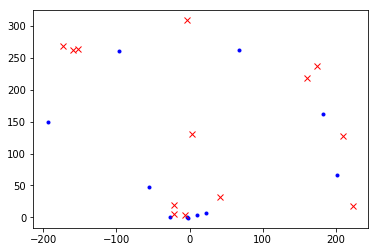

In [33]:
# Now we can plot!
import matplotlib.pyplot as plt
%matplotlib inline

shots_made = lillard_shots_df.loc[lillard_shots_df.SHOT_MADE_FLAG == 1,['LOC_X','LOC_Y']]
shots_missed = lillard_shots_df.loc[lillard_shots_df.SHOT_MADE_FLAG == 0,['LOC_X','LOC_Y']]

plt.plot(shots_made['LOC_X'], shots_made['LOC_Y'], 'b.')
plt.plot(shots_missed['LOC_X'], shots_missed['LOC_Y'], 'rx')
plt.show()

Now this doesn't look as nice as the shot chart we saw earlier, that require more code. But if you come to my plotting lecture you'll see how to make the shot charts look cool.

In [ ]:
# Another example with all of Lebron's Shots
bron = [player for player in player_list if player['full_name'] == 'LeBron James'][0]

bron_shots = shotchartdetail.ShotChartDetail(player_id = bron['id'], team_id = 0,
                                             context_measure_simple = 'FGA')

bron_shots_df = bron_shots.get_data_frames()[0]

# This one will look closer to a basketball court because
# Lebron has taken a ton of shots over his career
plt.plot(bron_shots_df['LOC_X'],bron_shots_df['LOC_Y'],'.')
plt.show()

#### Practice :D

In [ ]:
# Pull the playoff shots for Steph Curry from the 2016 finals







In [ ]:
# Explore nba_api more, figure out how to use another endpoint that interests you







### I Read it on Reddit

Now we'll step our game up even more with `praw` on to scrape Reddit. Why is this a step up? Well the nba api required no authentication. Anyone with an internet connection can scrape that data. Reddit is somewhat different. You'll need a Reddit account, and some credentials. You can set up an account here, https://www.reddit.com, and you can grab your credentials by creating an "app" here, https://www.reddit.com/prefs/apps. Note: In doing this you are agreeing not to use the data for commercial reasons. If you plan on developing an application in order to profit from Reddit data you need the explicit approval from Reddit. Don't mess around in this arena, you don't want a lawsuit on your hands.

Also do not share your credentials with anyone! Keep these private and never share them online.

I've stored my credentials on my local machine and will load them from a python file on my laptop. If you'd like to follow along with the code you'll need to enter your credentials by hand in the following block of code.

In [34]:
# Importing my credentials
import Credentials

In [35]:
client_id, client_secret, user_agent, username, password = Credentials.GiveRedditCred()

What are credentials? For Reddit once you've registered an app, you'll be given a client id, and a client secret. This help Reddit know who you are and what you're authorized to do. The user agent is a string, since we're just scraping data make it say something like `android:com.example.myredditapp:v1.2.3 (by /u/kemitche)`. The username is your Reddit username.

Once you've gotten credentials lets make sure you have `praw` run `pip install praw`, `pip3 install praw` if you're on a Mac.

In [36]:
import praw

Now I will admit here that I am by no means an expert in this package. I thought this might be of interest for group projects, so I set out to learn enough to introduce it here. My resources were the documentation, https://praw.readthedocs.io/en/latest/index.html, and Google.

Before we can scrape data we have to make a read-only instance of Reddit. This just means we'll be accessing the Reddit API and we'll only be reading the existing data.

In [37]:
# Make the read only instace
reddit = praw.Reddit(client_id = client_id,
                     client_secret = client_secret,
                     user_agent = user_agent, 
                     username = username)

In [38]:
# Test to see that we correctly did it
# You should see True
print(reddit.read_only)

True


In [39]:
for submission in reddit.subreddit('aww').hot(limit=10):
    print(submission.title)

Subreddit of the Week: /r/Catloaf, for when you want a nice, fresh loaf of cat.
Usually a lurker but wanted to share this one, meet my cat, Omelette!
My neighbours dog spies on me
Two months off the race track and my adopted greyhound is still trying to understand what being a lap dog is all about.
2.0 update on roof pillow cat
Guess the exact moment Asher recognizes his best friends, who he hasn't seen in 6 months. (Sorry it's so shaky; I was walking.)
Mom playing tug of war with puppy
Again! Again!
This gorgeous white fox 😍
Quokka appreciation post because they’re adorable 😍


In [40]:
# You can return submissions in a variety of orders
# controversial, gilded, hot, new, rising, top
for submission in reddit.subreddit('Columbus').controversial(limit = 5):
    print(str(submission.author) + ": ", submission.title)
    
print()
print()

# I can also get all of a submission's comments
for submission in reddit.subreddit('EarthPorn').hot(limit = 1):
    post = submission
    
comments = list(post.comments)

print(str(post.author) + ": ", post.title)
i = 0
for comment in comments:
    if i < 10:
        print(str(comment.author) + ": ", comment.body)
    else:
        break
    i = i +1

remotefarter:  Not to mention over priced
diggexpat:  Guy with an Anon mask and a backpack just went into the Giant Eagle in Reynoldsburg.
Mewyabe:  CPD female officer dumping woman at Portman protest out of her wheel chair and walking away.
JTCols:  Any good bars around town to commiserate the start of our march into darkness?
Kicker774:  Happy Birthday to Karina Nova!


jetclarke:  Morning reflections in Lago di Carezza, Italy [1600x2000] [OC]
jetclarke:  Taken at my favourite lake in Italy. I arrived before sunrise and noticed how perfectly still the water was, hoping it would stay still when the sun hit the peaks behind it. Luckily it did for just a few minutes before the winds picked up and ruined the reflection. I'd definitely recommend getting there before the crowds!

Phone wallpaper version [here](https://www.reddit.com/user/jetclarke/comments/bucq88/lago_di_carezza_wallpaper/)

Taken with a Canon 5D III:

100mm f/4.5 ISO 200

If you want to see more of my work, feel free to c

In [41]:
# We can get more than posts!
# We can get subreddits, redditors and more

# Here's an example where we grab a subreddit
subreddit = reddit.subreddit('math')

In [42]:
print("title: ", subreddit.title)
print("display name: ", subreddit.display_name)
print("subscriber count: ", subreddit.subscribers)
print("currently active users: ", subreddit.active_user_count)
print("description: ", subreddit.description)

title:  math
display name:  math
subscriber count:  810467
currently active users:  653
description:  **Welcome to /r/math.**
---

This subreddit is for discussion of mathematical links and questions. **Please read the [FAQ](http://www.reddit.com/r/math/wiki/faq) before posting.**

Homework problems, practice problems, and similar questions should be directed to /r/learnmath, /r/homeworkhelp or /r/cheatatmathhomework. Do not **ask or answer** this type of question in /r/math.

If you're asking for help learning/understanding something mathematical, post in the *[Simple Questions](http://www.reddit.com/r/math/search?q=Simple+Questions+author%3Aautomoderator+&restrict_sr=on&sort=new&t=all)* thread or /r/learnmath. **This includes reference requests** - also see our lists of recommended [books](https://www.reddit.com/r/math/wiki/faq#wiki_what_are_some_good_books_on_topic_x.3F) and [free online resources](https://www.reddit.com/r/math/comments/8ewuzv/a_compilation_of_useful_free_online_mat

In [43]:
# How did I know all of that was there?
# check out the vars() function of python
vars(subreddit)

{'_reddit': <praw.reddit.Reddit at 0x11ca04550>,
 '_fetched': True,
 '_info_params': {},
 '_comments': None,
 'display_name': 'math',
 '_banned': None,
 '_contributor': None,
 '_filters': None,
 '_flair': None,
 '_emoji': None,
 '_widgets': None,
 '_mod': None,
 '_moderator': None,
 '_modmail': None,
 '_muted': None,
 '_quarantine': None,
 '_stream': None,
 '_stylesheet': None,
 '_wiki': None,
 '_path': 'r/math/',
 'user_flair_background_color': None,
 'submit_text_html': '<!-- SC_OFF --><div class="md"><p><strong>Read the sidebar before posting.</strong> Homework problems, practice problems, and similar questions should be directed to <a href="/r/learnmath">/r/learnmath</a>, <a href="/r/homeworkhelp">/r/homeworkhelp</a> or <a href="/r/cheatatmathhomework">/r/cheatatmathhomework</a>, and will be removed. If you are asking for a calculation to be made, please post to <a href="/r/askmath">/r/askmath</a> or <a href="/r/learnmath">/r/learnmath</a> instead. If you are asking for advice on c

This will be all we'll learn about for `praw`. If this is interesting to you check out the documentation here, https://praw.readthedocs.io/en/latest/index.html. Learn all the things you can and can't do with `praw`!

## Tweet Tweet

The last python API wrapper we'll demonstrate is `tweepy`, documentation here: http://tweepy.readthedocs.org. This wrapper allows you to interact with the Twitter API. This is exciting stuff! Unfortunately, you will be unable to run the code on your personal machine because like Reddit you will need some credentials, but unlike Reddit, the process to get Twitter credentials takes longer (thanks Russia). If this is something of interest to you, you can apply for access here, https://developer.twitter.com/en/apply-for-access.html. If you explain that you're using it to learn and for academic research I've been told the process is relatively quick. Luckily I haven't had to go through this process because I gained access before this was an issue and was grandfathered in.

In [44]:
# To check you have tweepy run the following
import tweepy

In [45]:
# Here I'll grab my credentials
consumer_key, consumer_secret, access, access_secret = Credentials.GiveTwitterCred()

We can do all sorts of things with `tweepy` we will see a few examples here.

In [46]:
# First we have to create a Twitter Client
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [47]:
# Let's grab a user's timeline!
# Here I'll print the ten most recent tweets from Tom Hanks
for tweet in api.user_timeline('tomhanks', count = 10, tweet_mode = 'extended'):
    print(str(tweet.user.screen_name) + ": ",tweet.full_text)
    print("<3: ", tweet.favorite_count)
    print("retweets: ", tweet.retweet_count)
    print()

tomhanks:  In the UK?  Prepared!  Hanx https://t.co/ncjCfeZUQl
<3:  15120
retweets:  1405

tomhanks:  In the US, remember our Fallen this Memorial Day. Hanx.
<3:  11126
retweets:  648

tomhanks:  On Monday I will bleed claret and blue for Aston Villa. One match away for a return to the Premier League. Up the Villa!  Hanx
<3:  44077
retweets:  7469

tomhanks:  Well, howdy partner!  Where’s Buzz? Hanx https://t.co/sY4jjMJslT
<3:  58693
retweets:  3485

tomhanks:  We the People. Hidden Heroes. Veteran Care Givers. Connect if you have a wounded veteran in your family!  Hanx https://t.co/CGKKEBSp3V https://t.co/cdJSLUKFJE
<3:  9913
retweets:  737

tomhanks:  Wrap Gifts! @Hankskerchiefs!  Bespoke perfection and gorgeous. Colin Hanks knows his kerchiefs!  Hanx. #Hankskerchiefs https://t.co/C1DUc5ph73
<3:  7421
retweets:  355

tomhanks:  I can’t get enough of 2001 even in 2019. Hanx https://t.co/UZrm69qAht
<3:  4561
retweets:  334

tomhanks:  Historic Route 66.  Roadkill?  I hope not!  Hanx. h

This code returns an iterable object from twitter. You can cycle through and get a tweet object from the Twitter API. Tweet objects have a bunch of attributes. In the previous example we saw that they have a user, full_text, favorite_count, and retweet_count. You can see all of the attributes here, https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json.

We can grab more than timelines!

We can grab Profile data, friend and follower data, and query tweets. In the rest of this section we'll see how to grab a profile, a user's followers, and query tweets. We'll also learn a little about rate limits, that typically apply to all publically accessible APIs.

In [48]:
# Here we grab BillSimmons Profile
bill = api.get_user('BillSimmons')

In [49]:
print(bill.screen_name + ": ", bill.id_str)
print("Followers: ", bill.followers_count)
print("Following: ", bill.friends_count)
print("Bio: ", bill.description)
print("Location: ", bill.location)

BillSimmons:  32765534
Followers:  5852500
Following:  646
Bio:  @HBO + @ringer (CEO) + The BS Podcast https://t.co/MwceMXicPK Past Life: @grantland33/@30for30
Location:  LA (via Boston)


Again we can learn more about a user object in the docs.

Next up we'll grab a user's followers.

In [50]:
# Here we'll grab the atlantic's followers
atlantic = api.get_user('TheAtlantic')
atlantic_followers = atlantic.followers_count
atlantic_id = atlantic.id

print(atlantic.screen_name, "- ", atlantic_followers, "followers")

TheAtlantic -  1783697 followers


Wow that's a lot of followers! Now if you're thinking that it's crazy that Twitter will just hand over all of that data in an instant for free... you're right! Twitter would never do that. What you're thinking about is called firehouse access and that costs a pretty penny.

The free version of the Twitter API has rate limits in place. We can only pull 15,000 followers every 15 minutes. Both versions of the API also don't deliver them in a nice list. They deliver them in pages with a either 100 results per page (if you want the full user) or 5000 results per page (if you're okay with just the id numbers). We'll see how to do the latter.

In [51]:
# We import the Cursor from tweepy, this is a function that
# imports the results from the Twitter API
from tweepy import Cursor

In [ ]:
# Make an empty list to hold the Followers
followers = []

# Put the api endpoint you'd like to use into the Cursor
Pages = Cursor(api.followers_ids, user_id = atlantic_id).pages(2)

# Go through the pages and record the followers
for Page in Pages:
    for follower in Page:
        followers.append(follower)

In [ ]:
print(len(followers))

Looks like we got 10000 followers, just like we planned! If we need their profile information we can grab it using tweepy, but it will take a little while because of the rate limit.

In [ ]:
for user in api.lookup_users(followers[:20]):
    print(user.screen_name)
    print(user.name)
    print()

Finally we'll go over one more feature of the `tweepy`, how to query tweets with keywords.

In [ ]:
# Let's define a query
query = "Taco Tuesday"

# Again we use Cursor
search = Cursor(api.search, q = query, count=100,
                result_type="recent", include_entities=True, 
                tweet_mode='extended').pages(1)

# Print our results
for Page in search:
    for tweet in Page:
        print(tweet.user.screen_name + ": ", tweet.full_text)
        print()

## Wrap Up

We've learned a lot today. We talked about parsing html pages for data with `BeautifulSoup`. Then we talked about how some websites have handy python API wrappers that make scraping data much easier.

We saw examples from saved html code, live websites, nba stats, Reddit, and Twitter. There are also python API wrappers for Facebook, Instagram, Spotify and many more. The web is full of data and as we've seen python provides away to retrieve it!